In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('Desktop\DS\data.csv')
df1=df.drop(['latitude','longitude','d_centre','instant_bookable_f','instant_bookable_t','room_type_Entire home/apt','room_type_Private room','room_type_Shared room'],axis=1)
df1

,accommodates,bathrooms,bedrooms,calculated_host_listings_count,guests_included,host_listings_count,minimum_nights,number_of_reviews
0,3,1.0,1.0,1,1,1.0,5,7
1,2,1.0,1.0,1,1,1.0,3,9
2,5,2.0,5.0,11,2,15.0,6,4
3,4,1.0,2.0,1,1,1.0,2,0
4,2,1.0,1.0,1,1,1.0,5,3
5,2,1.0,2.0,2,1,3.0,3,1
6,2,1.5,1.0,1,1,1.0,2,7
7,2,1.0,0.0,1,1,1.0,2,15
8,4,1.0,2.0,1,1,2.0,4,37
9,4,1.0,3.0,1,1,1.0,3,1


In [2]:
df1=df1[:150]

In [3]:
np.isfinite(df1.all())

accommodates                      True
bathrooms                         True
bedrooms                          True
calculated_host_listings_count    True
guests_included                   True
host_listings_count               True
minimum_nights                    True
number_of_reviews                 True
dtype: bool

In [76]:
from sklearn.model_selection import train_test_split
x=(df1.iloc[:,:7])
y=(df1['number_of_reviews'])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=45)

In [77]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print(pred)

[15.6 18.  15.   7.4 31.  13.4 15.2  4.2 18.2  9.2 11.6 26.8 15.2 25.8
 13.4  7.  36.  16.2  8.2  8.   8.4  8.   8.   6.6  9.6  4.6  4.2 50.
 14.4 18.2  4.6  8.6  7.   9.6 34.  14.   7.   5.2  4.6 11.6  6.4 12.8
 11.6 10.6  4.6 33.2 18.2  5.8  6.4  4.6 36.   7.  11.6 11.6  8.   4.6
  5.8  6.4 12.6 16.2]


In [169]:
from sklearn.metrics import mean_squared_error
from sklearn import neighbors
from math import sqrt
rmse=list()
rmse1=list()
new=list()
mylist=list(range(50))
mylist=list(filter(lambda x:x%2!=0,mylist))
for k in mylist:
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train,y_train)
    pred=knn.predict(x_test)
    pred1=knn.predict(x_train)
    error=sqrt(mean_squared_error(y_test,pred)) 
    error1=sqrt(mean_squared_error(y_train,pred1))
    rmse.append(error)
    new.append([error,k])
    rmse1.append(error1)
    print('RMSE test value for k= ' , k , 'is:', error, '\nRMSE train value for k is = ',error1)

RMSE test value for k=  1 is: 41.13230684834813 
RMSE train value for k is =  6.61731734835869
RMSE test value for k=  3 is: 40.34079361675511 
RMSE train value for k is =  15.781806997260022
RMSE test value for k=  5 is: 39.81680549717669 
RMSE train value for k is =  18.498660612175264
RMSE test value for k=  7 is: 39.606954999769194 
RMSE train value for k is =  20.002981637156427
RMSE test value for k=  9 is: 38.90934382686294 
RMSE train value for k is =  21.293043229803544
RMSE test value for k=  11 is: 38.94188649020458 
RMSE train value for k is =  22.122959665302854
RMSE test value for k=  13 is: 38.932945693268955 
RMSE train value for k is =  21.973459874494406
RMSE test value for k=  15 is: 38.78165182813283 
RMSE train value for k is =  22.11639579504226
RMSE test value for k=  17 is: 38.77062497581119 
RMSE train value for k is =  22.100872341308797
RMSE test value for k=  19 is: 38.63199603006361 
RMSE train value for k is =  22.359670114861473
RMSE test value for k=  21

In [163]:
newList=list()
for x in mylist:
    newList.append(1/x)

In [171]:
Rmsetest=min(new)
print("Minimum R squared test error=",Rmsetest[0])
Rmsetrain=min(rmse1)
print("Minimum R squared train error=",Rmsetrain)
print("Optimal K value= ",Rmsetest[1])

Minimum R squared test error= 37.852538226726104
Minimum R squared train error= 6.61731734835869
Optimal K value=  45


Text(0, 0.5, 'R squared test error')

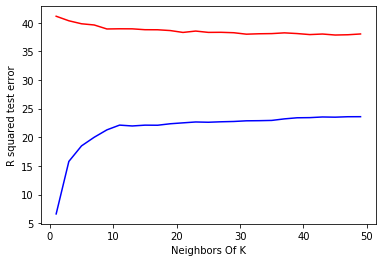

In [172]:
plt.plot(mylist,rmse,color='red')
plt.plot(mylist,rmse1,color='blue')
plt.xlabel('Neighbors Of K')
plt.ylabel('R squared test error')

Text(0, 0.5, 'R squared test error')

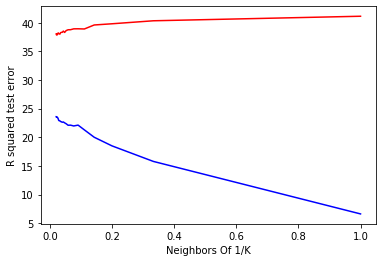

In [173]:
plt.plot(newList,rmse,color='red')
plt.plot(newList,rmse1,color='blue')
plt.xlabel('Neighbors Of 1/K')
plt.ylabel('R squared test error')

# MANUAL KNN FUNCTION

In [174]:
def train(x_train,y_train):
    return

In [178]:
def predic(x_train,y_train,x_test,k):
    distance=[]
    target=[]
    p=0
    for i in range(len(x_train)):
        dis=np.sqrt(np.sum(np.square(x_test-x_train.values[i])))
        distance.append([dis,y_train.values[i]])
        distance=sorted(distance)
    for i in range(k):
        p=p+distance[i][1]
    return(p/k)

In [179]:
def KNN(x_train,y_train,x_test,pred,k):
    if k>len(x_train):
        raise ValueError
    
    train(x_train,y_train)
    for i in range(len(x_test)):
        print("K   ",k)
        print(x_test.iloc[i,:])
        print("Predicted Response =",predic(x_train,y_train,x_test.iloc[i,:],k))

In [181]:
prediction=[]
try:
    KNN(x_train,y_train,x_test,prediction,49)
except ValueError:
    print("Sorry")

K    49
accommodates                      3.0
bathrooms                         1.0
bedrooms                          1.0
calculated_host_listings_count    1.0
guests_included                   1.0
host_listings_count               1.0
minimum_nights                    5.0
Name: 0, dtype: float64
Predicted Response = 11.979591836734693
K    49
accommodates                      2.0
bathrooms                         1.0
bedrooms                          1.0
calculated_host_listings_count    2.0
guests_included                   1.0
host_listings_count               2.0
minimum_nights                    2.0
Name: 43, dtype: float64
Predicted Response = 18.6734693877551
K    49
accommodates                      3.0
bathrooms                         1.0
bedrooms                          1.0
calculated_host_listings_count    1.0
guests_included                   2.0
host_listings_count               1.0
minimum_nights                    3.0
Name: 129, dtype: float64
Predicted Response = 13.2

Predicted Response = 13.53061224489796
K    49
accommodates                      2.0
bathrooms                         1.0
bedrooms                          1.0
calculated_host_listings_count    1.0
guests_included                   2.0
host_listings_count               3.0
minimum_nights                    3.0
Name: 64, dtype: float64
Predicted Response = 21.040816326530614
K    49
accommodates                      4.0
bathrooms                         2.0
bedrooms                          2.0
calculated_host_listings_count    2.0
guests_included                   4.0
host_listings_count               2.0
minimum_nights                    3.0
Name: 10, dtype: float64
Predicted Response = 12.938775510204081
K    49
accommodates                        2.0
bathrooms                           1.0
bedrooms                            1.0
calculated_host_listings_count     50.0
guests_included                     1.0
host_listings_count               106.0
minimum_nights                     